Import Important libraries

In [114]:
import os
!pip install google-colab
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile
from PIL import Image
import math
import json
import base64
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io
from google.colab import files
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
!pip install kaggle # Install the Kaggle API client

The group used Kaggle to upload data sets

In [116]:
# Upload kaggle.json using the file explorer
#drive.mount('/content/drive')
files.upload()
!ls -lha kaggle.json
!pip install kaggle
!pip install -q kaggle
#The kaggle API client expects the file to be in ~/.kaggle, so move it there
!chmod 600 /root/.kaggle/kaggle.json
#check your directory before downloading the datasets
!pwd #Print Working Directory
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
# Test the Kaggle API (optional)
!kaggle datasets list
!kaggle datasets download  danniee/foodclass

Saving kaggle.json to kaggle (1).json
-rw-r--r-- 1 root root 63 Nov 29 17:21 kaggle.json
/content
ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset           Customer Shopping (Latest Trends) Dataset      76KB  2024-11-23 15:26:12           3292         62  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset                      4KB  2024-11-20 06:42:01           3159         67  1.0              
marmarplz/student-academic-grades-and-programs                Student Academic Marks and Programs             2MB  2024-11-18 18:31:40           1345         29  1.0              
st

In [117]:

# Set Kaggle API credentials (assuming kaggle.json is in ~/.kaggle/)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser("~/.kaggle")  # Update this path if your kaggle.json is stored elsewhere

# Download the dataset using Kaggle API
!kaggle datasets download -d danniee/foodclass -p /tmp --unzip

# Function to create a directory if it doesn't exist, otherwise recreate it
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH


Dataset URL: https://www.kaggle.com/datasets/danniee/foodclass
License(s): unknown
100% 1.01G/1.01G [00:44<00:00, 25.8MB/s]
100% 1.01G/1.01G [00:44<00:00, 24.6MB/s]


In [ ]:
# Import necessary libraries
import os
import shutil
import random
from shutil import copyfile
from PIL import Image

# Function to create a directory if it doesn't exist, otherwise recreate it
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH

# Create directories for the dataset
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))

    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))


    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))

    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))

    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

# Function to split data into training and validation sets
def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
    data = os.listdir(SOURCE)
    random_data = random.sample(data, len(data))

    train_size = len(data) * SPLIT_SIZE

    for i, filename in enumerate(random_data):
        filepath = os.path.join(SOURCE, filename)
        if os.path.getsize(filepath) > 0:
            if i < train_size:
                copyfile(filepath, os.path.join(TRAINING, filename))
            else:
                copyfile(filepath, os.path.join(VALIDATION, filename))

# Update the dataset directory paths to the downloaded dataset location
dataset_train_dir = '/tmp/dataset/train'
dataset_test_dir = '/tmp/dataset/test'

# Create paths for each category in the test dataset
fapples_test_dir = os.path.join(dataset_test_dir, 'ripeapples')
ftomatoes_test_dir = os.path.join(dataset_test_dir, 'ripetomatoes')

rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rtomatoes_test_dir = os.path.join(dataset_test_dir, 'rottentomatoes')

In [ ]:

# Set Kaggle API credentials (assuming kaggle.json is in ~/.kaggle/)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser("~/.kaggle")  # Update this path if your kaggle.json is stored elsewhere

# Download the dataset using Kaggle API
!kaggle datasets download -d danniee/foodclass -p /tmp --unzip

# Function to create a directory if it doesn't exist, otherwise recreate it
def make_dir(PATH):
    if not os.path.exists(PATH):
        os.mkdir(PATH)
        return PATH
    else:
        shutil.rmtree(PATH)
        os.mkdir(PATH)
        return PATH


Dataset URL: https://www.kaggle.com/datasets/danniee/foodclass
License(s): unknown
100% 1.01G/1.01G [00:35<00:00, 32.1MB/s]
100% 1.01G/1.01G [00:35<00:00, 30.7MB/s]


In [118]:
TRAIN_PATH = '/tmp/dataset/train'
TEST_PATH = '/tmp/dataset/test'
SIZE = (240, 240)

In [119]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)


['rottentomatoes', 'rottenapples', 'ripeapples', 'ripetomatoes']




*   List item
*   List item


- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''

In [120]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TEST_PATH ,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9009 images belonging to 4 classes.
Found 94 images belonging to 4 classes.


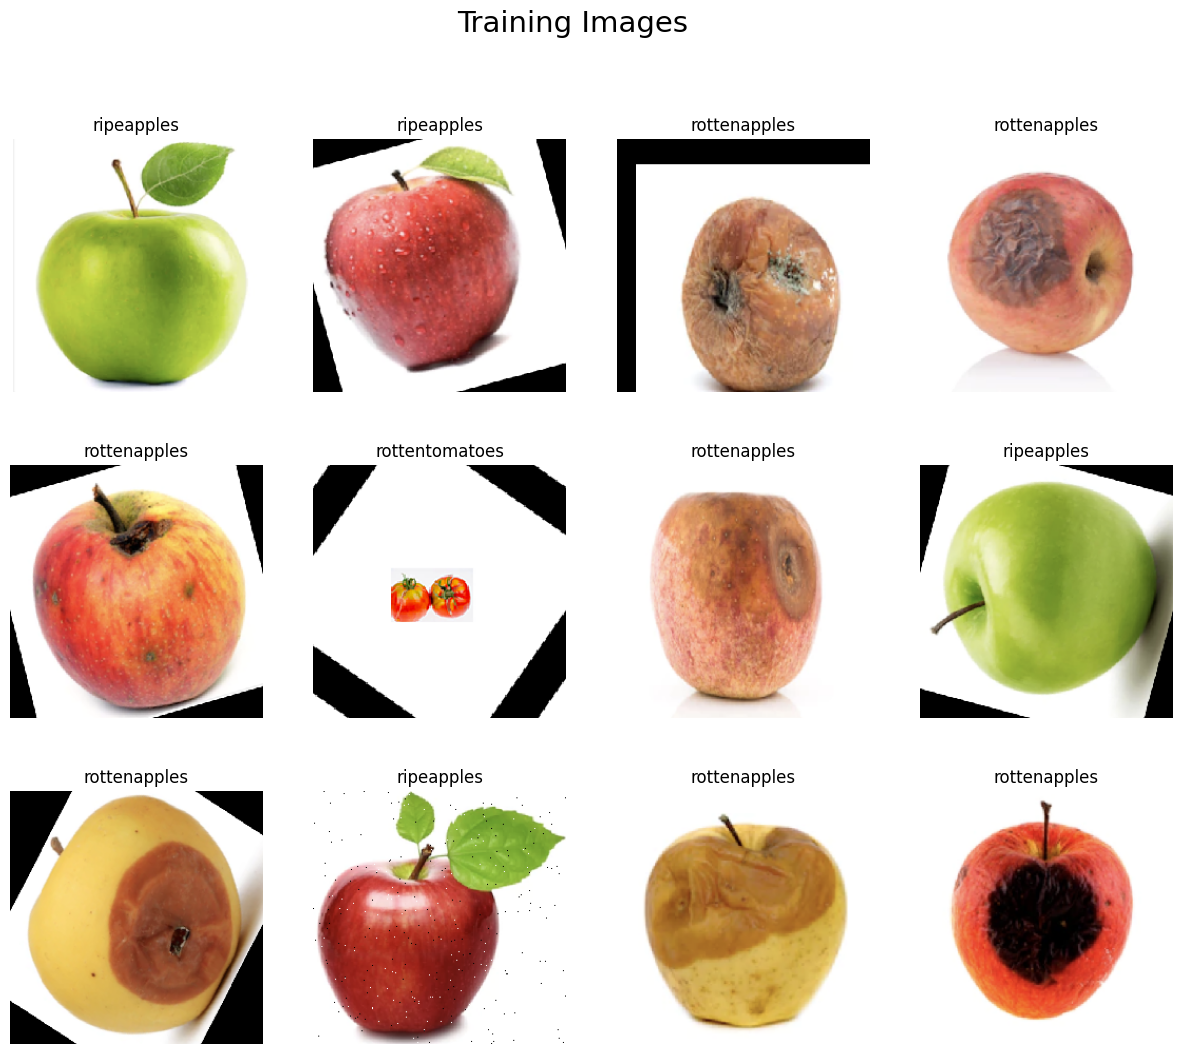

In [121]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Training Images", fontsize=21)
plt.show()

In [122]:
from keras.applications.densenet import DenseNet121

DenseNet121 is pre built CNNN architrecture

In [123]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3,DenseNet121
from keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications import Xception, VGG16, InceptionV3,DenseNet121
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd

model= DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=Input(shape=(240, 240, 3)),
    input_shape=None,
    pooling=None,
    classes=NUM_LABELS,
)


In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()
epochs = 10
stepsperepoch=150
validationsteps=1


In [126]:
train_len = 0
for foldername in os.listdir(TRAIN_PATH):
    train_len = train_len + len(os.listdir(os.path.join(TRAIN_PATH,foldername)))

val_len = 0
for foldername in os.listdir(TEST_PATH):
    val_len = val_len + len(os.listdir(os.path.join(TEST_PATH,foldername)))

print(train_len)
print(val_len)

10008
958


In [127]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [129]:
   hist = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[callbacks],
    steps_per_epoch=train_len//32,
    validation_data=val_dataset,
    validation_batch_size= validationsteps
   )

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 299ms/step - accuracy: 0.9764 - loss: 0.0639 - val_accuracy: 0.5532 - val_loss: 4.9288
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9777 - loss: 0.0706 - val_accuracy: 0.8404 - val_loss: 1.0331
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9774 - loss: 0.0642 - val_accuracy: 0.2872 - val_loss: 66.3481
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9767 - loss: 0.0642 - val_accuracy: 0.7553 - val_loss: 0.9497
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9844 - loss: 0.0445 - val_accuracy: 0.6064 - val_loss: 2.7005
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9818 - loss: 0.0597 - val_accuracy: 0.9681 - val_loss: 0.0819
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 298ms/step - accuracy: 0.9853 - loss: 0.0444 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.9890 - loss: 

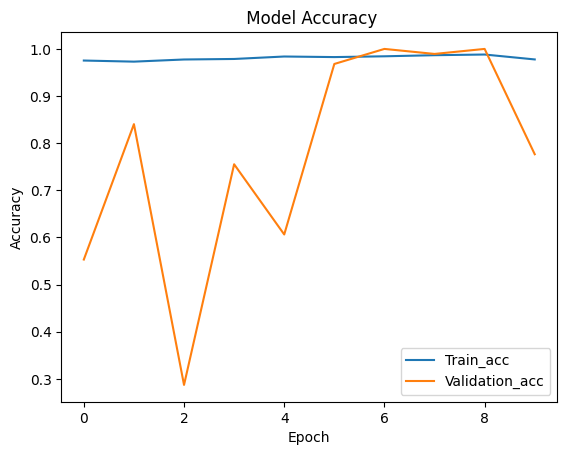

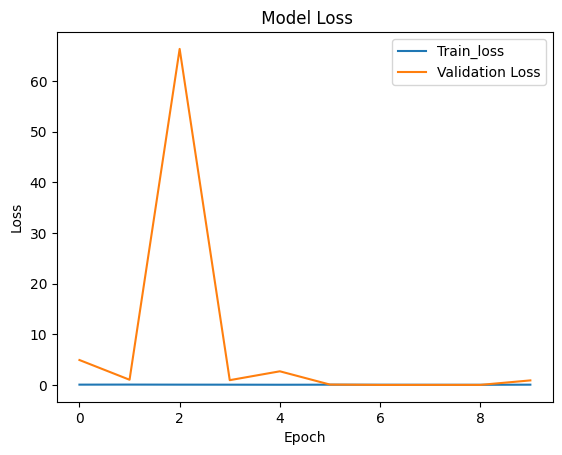

In [130]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title(' Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(' Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [131]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 958 images belonging to 4 classes.
958/958 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4919 - loss: 2.3211
accuracy test:  0.7379958033561707
loss test:  1.2767555713653564


In [132]:
model.save('model.h5')

## Predict Image

In [133]:
'''from keras.utils import get_file
import pathlib
import cv2
from google.colab import files
model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(240, 240), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)

  # Get the index of the predicted class (highest probability)
  predicted_class_index = np.argmax(classes[0])
  #print(predicted_class_index)


  if predicted_class_index in (2, 3):  # Ripe food classes
    image_name.append(fn)
    image_conf.append(classes[0][predicted_class_index]) # Confidence for 'Ripe food'
    predict_result.append('Ripe Food')  # Assuming "Ripe food" is equivalent to "Fresh food"
  elif predicted_class_index in (0, 1):  # Rotten food classes
    image_name.append(fn)
    image_conf.append(classes[0][predicted_class_index])  # Confidence for 'Rotten food'
    predict_result.append('Rotten Food')
  else:
    print(f"Warning: Unexpected predicted class {predicted_class_index} for image {fn}")

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Ripe Food':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')'''

'from keras.utils import get_file\nimport pathlib\nimport cv2\nfrom google.colab import files\nmodel_predict = tf.keras.models.load_model(\'model.h5\')\nmodel_predict.compile(optimizer=\'adam\',\n                      loss=\'binary_crossentropy\',\n                      metrics=[\'accuracy\'])\n\nuploaded = files.upload()\nimage_name = []\nimage_conf = []\npredict_result = []\n\nfor fn in uploaded.keys():\n  path = fn\n  img = image.load_img(path, color_mode="rgb", target_size=(240, 240), interpolation="nearest")\n  # imgplot = plt.imshow(img)\n  img = image.img_to_array(img)\n  img = np.expand_dims(img, axis=0)\n  img = img/255\n\n  images = np.vstack([img])\n  classes = model_predict.predict(images, batch_size=10)\n\n  # Get the index of the predicted class (highest probability)\n  predicted_class_index = np.argmax(classes[0])\n  #print(predicted_class_index)\n\n\n  if predicted_class_index in (2, 3):  # Ripe food classes\n    image_name.append(fn)\n    image_conf.append(classes[0][p

In [134]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]

958/958 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step


In [135]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 4)


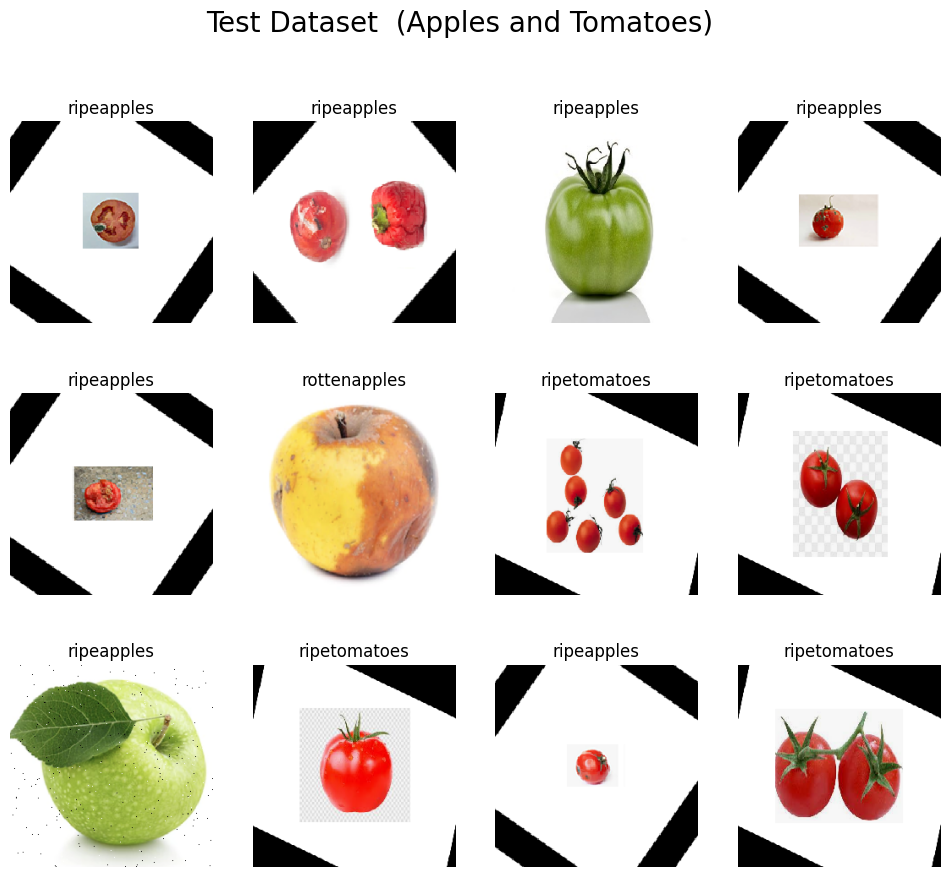

In [136]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0
apple_indices = []
tomato_indices = []

# Gather indices of apple and tomato predictions
for i in range(len(predictions)):
    predicted_label = labels[np.argmax(predictions[i])]
    if 'apple' in predicted_label.lower():  # Check if 'apple' is in the label (case-insensitive)
        apple_indices.append(i)
    elif 'tomato' in predicted_label.lower(): # Check if 'tomato' is in the label (case-insensitive)
        tomato_indices.append(i)

# Combine and shuffle indices to ensure a mix
all_indices = apple_indices + tomato_indices
random.shuffle(all_indices)

for i in range(3):  # For each row in the grid
    for j in range(4):  # For each column in the grid
        if idx < len(all_indices):
            current_index = all_indices[idx]
            predicted_label = labels[np.argmax(predictions[current_index])]
            ax[i, j].set_title(f"{predicted_label}")
            # Assuming your test_generator returns images in the shape (240, 240, 3)

            # Modification: Using integer division and modulo with batch size.
            ax[i, j].imshow(test_generator[current_index // test_generator.batch_size][0][current_index % test_generator.batch_size].reshape(240, 240, 3))

            ax[i, j].axis("off")
            idx += 1 # Change here: Increment idx by 1 to get the next prediction
        else:
            break


plt.suptitle("Test Dataset  (Apples and Tomatoes)", fontsize=20)
plt.show()

In [137]:
!pip install visualkeras

In [138]:
from tensorflow.keras import layers
from collections import defaultdict
# from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
# visualkeras.layered_view(model, legend=True,color_map=color_map,scale_xy=2, scale_z=1, max_z=200)

In [139]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

<ipython-input-139-96f95e6a42c8>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


In [140]:
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


958/958 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step


In [141]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [142]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

rottentomatoes       1.00      0.24      0.38       294
  rottenapples       0.80      0.89      0.85       184
    ripeapples       0.56      1.00      0.72       227
  ripetomatoes       0.88      0.97      0.92       253

      accuracy                           0.74       958
     macro avg       0.81      0.78      0.72       958
  weighted avg       0.83      0.74      0.69       958



In [143]:
print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

Confusion Matrix


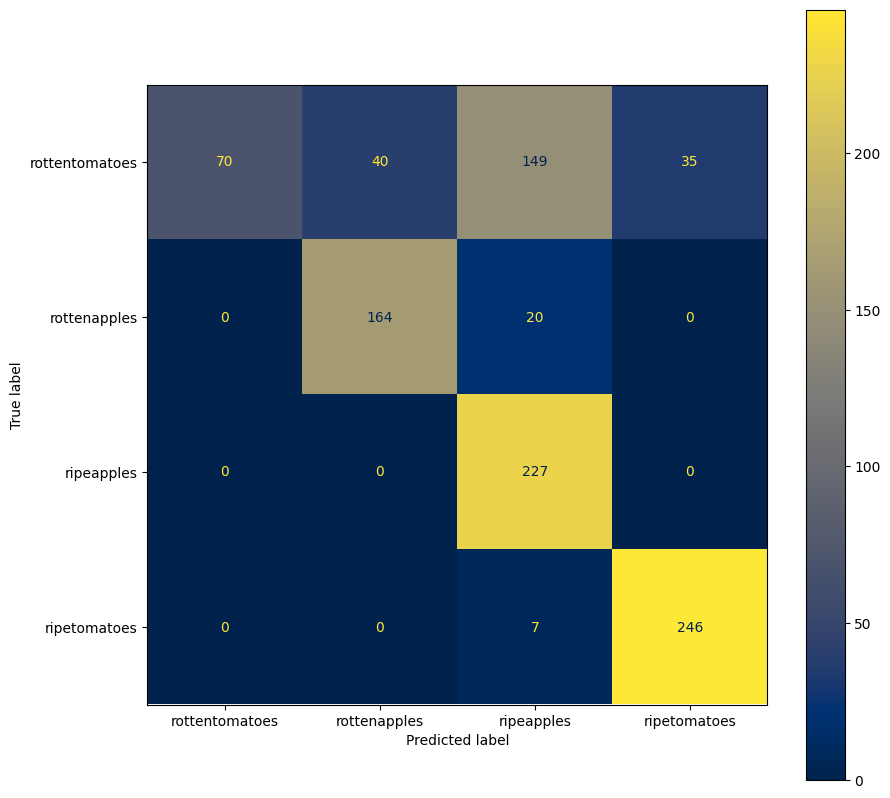

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")